In [1]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import gzip
import os
import sys
import glob
import cPickle
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


### First read the affiliation data from the overall file...

In [2]:
f = gzip.open("../../data/APS/aff_data_ISI.dat.gz", "rb")
Listone = []
for l in f:
    Listone.append(l.strip())
f.close()

In [3]:
len(Listone)

406276

### Now prepare the data frame...

In [4]:
EventsList = []
BrokenPapers = 0
for papero in Listone:
    vals = papero.split("|")    
    DOI, papID = vals[0].split("/")
    papID = papID.split(".")
    Journal, Issue, papID = papID[0], int(papID[1]), ".".join(papID[2:])
    try:
        date = vals[1].split("-") if "-" in vals[1] else vals[1].split()
        if len(date):
            Year  = int(date[0]) if int(date[0]) > 1880 else -1
            Month = int(date[1]) if len(date) > 1 and int(date[1])>=0 and int(date[1]) <= 12 else -1
            Day = int(date[2]) if len(date) > 2 and int(date[2])>=0 and int(date[2]) <= 31 else -1
        else:
            raise RuntimeError
            
        if Year<0 or Month<0 or Day<0:
            raise RuntimeError
    except:
        BrokenPapers += 1
        #print vals[:3]
        continue
        
    nAuth = int(vals[2])
    Auth = [vals[3+i].replace(".", "").replace(",", "") for i in range(nAuth)]
    
    EventsList.append([Journal, Issue, papID, Year, Month, Day, nAuth, Auth])

In [5]:
print EventsList[0], len(EventsList)

['PhysRev', 1, '16', 1913, 1, 0, 1, ['DW#CORNELIUS']] 405986


In [6]:
print ("Broken papers:", BrokenPapers)

('Broken papers:', 290)


In [7]:
Series = pd.DataFrame(data=EventsList, columns=["Journal", "Issue", "PapID", "Year", "Month", "Day", "nAuth", "Auth"])

In [8]:
Series.head()

,Journal,Issue,PapID,Year,Month,Day,nAuth,Auth
0,PhysRev,1,16,1913,1,0,1,[DW#CORNELIUS]
1,PhysRev,1,2,1913,1,0,1,[AD#COLE]
2,PhysRev,1,35,1913,1,0,2,"[SJ#ALLEN, EJ#LORENTZ]"
3,PhysRev,1,50,1913,1,0,1,[AL#CLARK]
4,PhysRev,1,56,1913,1,0,1,[F#SLATE]


In [9]:
Series.Month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  0])

In [10]:
Series.Day.unique()

array([ 0,  1, 15,  6, 13, 20, 27,  3, 10, 17, 24,  2,  9, 16, 23,  4, 11,
       18, 25,  8, 22, 29, 31,  7, 14, 21, 28,  5, 12, 19, 26, 30])

In [11]:
Series.Month.value_counts()

10    35535
11    35184
4     34546
7     34471
8     34167
12    33930
9     33925
3     33716
5     33539
1     32765
6     32385
2     31817
0         6
Name: Month, dtype: int64

In [12]:
Series.Day.value_counts()

15    114661
1     105273
0      96853
25      5594
10      4734
20      4456
5       4193
17      3049
18      3009
22      3001
4       2995
13      2989
11      2981
28      2926
14      2926
21      2914
8       2885
3       2855
6       2851
16      2844
9       2838
23      2817
2       2814
7       2808
27      2808
24      2792
12      2751
19      2728
30      2624
26      2554
29      2442
31      2021
Name: Day, dtype: int64

In [69]:
Series.groupby("Year").count()

,Journal,Issue,PapID,Month,Day,nAuth,Auth
Year,,,,,,,
1893,13,13,13,13,13,13,13
1894,20,20,20,20,20,20,20
1895,24,24,24,24,24,24,24
1896,26,26,26,26,26,26,26
1897,43,43,43,43,43,43,43
1898,49,49,49,49,49,49,49
1899,44,44,44,44,44,44,44
1900,54,54,54,54,54,54,54
1901,58,58,58,58,58,58,58


(57, 117)

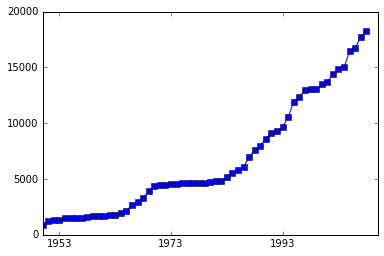

In [23]:
plt.plot(sorted(Series.Year.value_counts()), "s-")
xloc, xlab = plt.xticks()
junk = plt.xticks(xloc, ["%d" % (1893+l) for l in xloc])

plt.xlim(1950-1893, 2010-1893)

In [28]:
Series.groupby("Journal").first()

,Issue,PapID,Year,Month,Day,nAuth,Auth
Journal,,,,,,,
PhysRev,1,16,1913,1,0,1,[DW#CORNELIUS]
PhysRevA,1,106,1970,1,0,2,"[CR#STROUD, ET#JAYNES]"
PhysRevB,1,101,1970,1,1,2,"[A#PERKINS, JP#CARBOTTE]"
PhysRevC,1,112,1970,1,0,1,[L#INGBER]
PhysRevD,1,100,1970,1,1,1,[JC#BRODINE]
PhysRevE,47,106,1993,1,0,1,[R#ZYGADŁO]
PhysRevLett,1,11,1958,7,1,6,"[T#BOWEN, J#HARDY, GT#REYNOLDS, G#TAGLIAFERRI,..."
PhysRevSTAB,10,010001,2007,1,1,1,[#ANONYMOUS]
PhysRevSTPER,1,010101,2005,12,0,2,"[ND#FINKELSTEIN, SJ#POLLOCK]"


### Number of paper per journal...

In [17]:
Series.Journal.value_counts()

PhysRevB          120293
PhysRevLett        83721
PhysRevD           48392
PhysRev            47286
PhysRevA           46096
PhysRevE           28671
PhysRevC           26845
RevModPhys          2742
PhysRevSeriesI      1235
PhysRevSTAB          663
PhysRevSTPER          42
Name: Journal, dtype: int64

### Number of authors as a function of time...

In [18]:
Authors = set()
Months = []
NAuthors = []

for paper in sorted(EventsList, key=lambda p: p[3]*12+p[4]):
    if Months:
        if Months[-1] < (paper[3]*12 + paper[4]):
            Months.append(paper[3]*12 + paper[4])
            NAuthors.append(len(Authors))
            
    else:
        Months.append(paper[3]*12 + paper[4])
    Authors.update(paper[7])
    
NAuthors.append(len(Authors))
        
    

In [19]:
print sorted(EventsList, key=lambda p: p[3])[:10]

[['PhysRevSeriesI', 1, '19', 1893, 7, 0, 1, ['WA#ROGERS']], ['PhysRevSeriesI', 1, '1', 1893, 7, 0, 1, ['EF#NICHOLS']], ['PhysRevSeriesI', 1, '28', 1893, 7, 0, 1, ['BW#SNOW']], ['PhysRevSeriesI', 1, '51', 1893, 7, 0, 2, ['S#SHELDON', 'GM#DOWNING']], ['PhysRevSeriesI', 1, '59', 1893, 7, 0, 2, ['F#BEDELL', 'AC#CREHORE']], ['PhysRevSeriesI', 1, '117', 1893, 9, 0, 2, ['F#BEDELL', 'AC#CREHORE']], ['PhysRevSeriesI', 1, '127', 1893, 9, 0, 1, ['A#MARSTON']], ['PhysRevSeriesI', 1, '81', 1893, 9, 0, 3, ['F#BEDELL', 'NF#BALLANTYNE', 'RB#WILLIAMSON']], ['PhysRevSeriesI', 1, '95', 1893, 9, 0, 1, ['BW#SNOW']], ['PhysRevSeriesI', 1, '161', 1893, 11, 0, 2, ['A#MACFARLANE', 'GW#PIERCE']]]


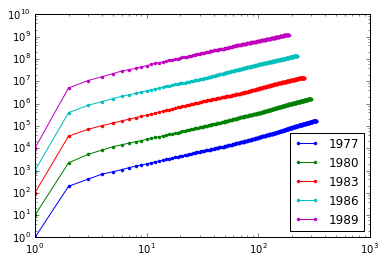

In [43]:
for i, starting in enumerate(np.arange(1977, 1990, 3)):
    start = 12*(starting-1893)
    plt.loglog(np.array(Months[start:])-Months[start]+1., 10**i*(np.array(NAuthors[start:])-NAuthors[start]+1.), ".-", label=starting)

X = np.logspace(0, 2.5)
#plt.loglog(X, 1e+2*X**1.25)

plt.legend(loc=4, fontsize=12)

## Saving the author-id map and counting the papers per author...

In [19]:
Authors = set()
for paper in EventsList:
    Authors.update(paper[7])

In [20]:
len(Authors)

219693

In [21]:
PapersPerAuthor = {a: 0 for a in Authors}

for paper in EventsList:
    for a in paper[7]:
        PapersPerAuthor[a] += 1

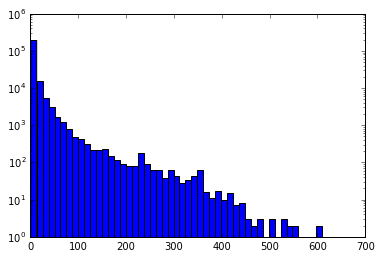

In [22]:
junk = plt.hist([v for v in PapersPerAuthor.values()], bins=np.linspace(.5,610))
plt.yscale("log")

In [23]:
AuthorsPapers = pd.DataFrame(data=[[k,v] for k,v in PapersPerAuthor.items()], columns=["Author", "npap"])

In [24]:
AuthorsPapers.head()

,Author,npap
0,EA#SCHUBERT,1
1,WA#BRYAN,7
2,KP#NAYAK,1
3,ZF#BANFIELD,1
4,MH#SHAMOS,8


In [25]:
AuthorsPapers.sort_values("npap", ascending=False).head()

,Author,npap
15706,J#ZHANG,788
58599,J#LEE,751
125099,J#LI,728
169430,S#LEE,659
204112,J#WANG,652


In [26]:
Author2idx = pd.Series(index=Authors, data=range(len(Authors)))
Author2idx.head()

EA#SCHUBERT    0
WA#BRYAN       1
KP#NAYAK       2
ZF#BANFIELD    3
MH#SHAMOS      4
dtype: int64

In [27]:
idx2Author = pd.Series(index=Author2idx.values, data=Author2idx.index)
idx2Author.head()

0    EA#SCHUBERT
1       WA#BRYAN
2       KP#NAYAK
3    ZF#BANFIELD
4      MH#SHAMOS
dtype: object

In [28]:
print (idx2Author[50], Author2idx["WA#ORTIZ"])

('WA#ORTIZ', 50)


## Writing data to files for later analysis

In [54]:
# The real sequence...
ODIR = "../../data/APS/aff_data_ISI_original/"
ODIR_MONTH = "../../data/APS/aff_data_ISI_original_divided_per_month/"
ODIR_COMP = "../../data/APS/aff_data_ISI_company_like/"

In [55]:
try:
    os.mkdir(ODIR)
except Exception as E:
    print(str(E))
    
try:
    os.mkdir(ODIR_MONTH)
except Exception as E:
    print(str(E))
    
try:
    os.mkdir(ODIR_COMP)
except Exception as E:
    print(str(E))

In [31]:
def fix_month(m):
    """fixes problematic values of month."""
    if m == 0 or m > 12:
        return 6
    elif m > 0:
        return m
    else:
        return None
    
def day2decade(d):
    """fixes problematic values of day."""
    if d == 0 or 11 <= d <= 20:
        return 1
    elif 1 <= d <= 10:
        return 0
    elif 21 <= d <= 31:
        return 2
    else:
        return None
    
def date2string(year, month=0, day=0):
    return "%04d"%year + "-%02d" % fix_month(month) + "_deca%d" % day2decade(day)

EventsStorer = {}
EventsStorerMonth = {}
for paper in EventsList:
    [Year, Month, Day], autori_pap = paper[3:6], paper[7]
    
    dateString = date2string(Year, Month, Day)
    EventsStorer.setdefault(dateString, [])
    EventsStorer[dateString].append([Author2idx[a] for a in autori_pap])
    
    EventsStorerMonth.setdefault(dateString[:7], [])
    EventsStorerMonth[dateString[:7]].append([Author2idx[a] for a in autori_pap])

In [32]:
sorted(EventsStorer.keys(), reverse=True)

['2008-01_deca0',
 '2007-12_deca1',
 '2007-12_deca0',
 '2007-11_deca0',
 '2007-10_deca0',
 '2007-09_deca0',
 '2007-08_deca0',
 '2007-07_deca0',
 '2007-06_deca1',
 '2007-06_deca0',
 '2007-05_deca0',
 '2007-04_deca0',
 '2007-03_deca0',
 '2007-02_deca0',
 '2007-01_deca0',
 '2006-12_deca2',
 '2006-12_deca1',
 '2006-12_deca0',
 '2006-11_deca2',
 '2006-11_deca1',
 '2006-11_deca0',
 '2006-10_deca2',
 '2006-10_deca1',
 '2006-10_deca0',
 '2006-09_deca2',
 '2006-09_deca1',
 '2006-09_deca0',
 '2006-08_deca2',
 '2006-08_deca1',
 '2006-08_deca0',
 '2006-07_deca2',
 '2006-07_deca1',
 '2006-07_deca0',
 '2006-06_deca2',
 '2006-06_deca1',
 '2006-06_deca0',
 '2006-05_deca2',
 '2006-05_deca1',
 '2006-05_deca0',
 '2006-04_deca2',
 '2006-04_deca1',
 '2006-04_deca0',
 '2006-03_deca2',
 '2006-03_deca1',
 '2006-03_deca0',
 '2006-02_deca2',
 '2006-02_deca1',
 '2006-02_deca0',
 '2006-01_deca2',
 '2006-01_deca1',
 '2006-01_deca0',
 '2005-12_deca2',
 '2005-12_deca1',
 '2005-12_deca0',
 '2005-11_deca2',
 '2005-11_

In [33]:
print EventsStorer['1967-04_deca1'][77]

[107192, 170216, 43840]


In [34]:
print [idx2Author[i] for i in EventsStorer['1967-04_deca1'][77]]

['J#RAPAPORT', 'WE#DORENBUSCH', 'TA#BELOTE']


In [53]:
print Series.Auth[["J#RAPAPORT",'WE#DORENBUSCH','TA#BELOTE']]

J#RAPAPORT       NaN
WE#DORENBUSCH    NaN
TA#BELOTE        NaN
Name: Auth, dtype: object


In [96]:
# Super mega paranoia!
for pap in Series.iterrows():
    dati = pap[1]
    autori_temp = dati["Auth"]
    if autori_temp == ["J#RAPAPORT",'WE#DORENBUSCH','TA#BELOTE']:
        print "\n####################\nSELECTED PAPER \n#################\n", pap, "\n###############\n"
    
    date_tmp = date2string(dati["Year"], dati["Month"], dati["Day"])
    if [Author2idx[a] for a in autori_temp] not in EventsStorer[date_tmp]:
        print "Error at paper:\n", pap
        break
else:
    print "All good!"
    


####################
SELECTED PAPER 
#################
(18667, Journal                                   PhysRev
Issue                                         156
PapID                                        1255
Year                                         1967
Month                                           4
Day                                            20
nAuth                                           3
Auth       [J#RAPAPORT, WE#DORENBUSCH, TA#BELOTE]
Name: 18667, dtype: object) 
###############

All good!


In [56]:
from itertools import combinations

N_single_auth = 0
N_tot_paps = 0
N_gt10_paps = 0

for date_str, papers in sorted(EventsStorer.items()):
    if len(papers) <= 0:
        continue
    
    with open(os.path.join(ODIR, date_str+".dat"), "wb") as f_original,\
            open(os.path.join(ODIR_COMP, date_str+".dat"), "wb") as f_company:
        for papero in papers:
            N_tot_paps += 1
            if len(papero) < 2:
                N_single_auth += 1
                continue
            elif len(papero) > 10:
                N_gt10_paps += 1
                continue
            
            ostring = "\t".join(["%d"%a for a in papero]) + "\n"
            f_original.write(ostring)
            
            for a1, a2 in combinations(papero, 2):
                f_company.write("%d\t%d\t1\t1\n" % (a1, a2))
                f_company.write("%d\t%d\t1\t1\n" % (a2, a1))

        print("Saved", date_str)
print("Total Papers:", N_tot_paps, "Single authored papers:", N_single_auth, "More than 10 authors papers:", N_gt10_paps)

('Saved', '1893-07_deca1')
('Saved', '1893-09_deca1')
('Saved', '1893-11_deca1')
('Saved', '1894-01_deca1')
('Saved', '1894-03_deca1')
('Saved', '1894-05_deca1')
('Saved', '1894-07_deca1')
('Saved', '1894-09_deca1')
('Saved', '1894-11_deca1')
('Saved', '1895-01_deca1')
('Saved', '1895-03_deca1')
('Saved', '1895-05_deca1')
('Saved', '1895-07_deca1')
('Saved', '1895-09_deca1')
('Saved', '1895-11_deca1')
('Saved', '1896-01_deca1')
('Saved', '1896-03_deca1')
('Saved', '1896-07_deca1')
('Saved', '1896-09_deca1')
('Saved', '1896-11_deca1')
('Saved', '1897-01_deca1')
('Saved', '1897-03_deca1')
('Saved', '1897-05_deca1')
('Saved', '1897-07_deca1')
('Saved', '1897-08_deca1')
('Saved', '1897-09_deca1')
('Saved', '1897-10_deca1')
('Saved', '1897-11_deca1')
('Saved', '1898-01_deca1')
('Saved', '1898-02_deca1')
('Saved', '1898-03_deca1')
('Saved', '1898-04_deca1')
('Saved', '1898-05_deca1')
('Saved', '1898-07_deca1')
('Saved', '1898-08_deca1')
('Saved', '1898-09_deca1')
('Saved', '1898-11_deca1')
(

In [57]:
# Saving the files per month...

N_single_auth = 0
N_tot_paps = 0
N_gt10_paps = 0

for date_str, papers in sorted(EventsStorerMonth.items()):
    if len(papers) <= 0:
        continue
    
    with open(os.path.join(ODIR_MONTH, date_str+".dat"), "wb") as f_original:
        for papero in papers:
            N_tot_paps += 1
            if len(papero) < 2:
                N_single_auth += 1
                continue
            elif len(papero) > 10:
                N_gt10_paps += 1
                continue
            
            ostring = "\t".join(["%d"%a for a in papero]) + "\n"
            f_original.write(ostring)

        print("Saved", date_str)
print("Total Papers:", N_tot_paps, "Single authored papers:", N_single_auth, "More than 10 authors papers:", N_gt10_paps)

('Saved', '1893-07')
('Saved', '1893-09')
('Saved', '1893-11')
('Saved', '1894-01')
('Saved', '1894-03')
('Saved', '1894-05')
('Saved', '1894-07')
('Saved', '1894-09')
('Saved', '1894-11')
('Saved', '1895-01')
('Saved', '1895-03')
('Saved', '1895-05')
('Saved', '1895-07')
('Saved', '1895-09')
('Saved', '1895-11')
('Saved', '1896-01')
('Saved', '1896-03')
('Saved', '1896-07')
('Saved', '1896-09')
('Saved', '1896-11')
('Saved', '1897-01')
('Saved', '1897-03')
('Saved', '1897-05')
('Saved', '1897-07')
('Saved', '1897-08')
('Saved', '1897-09')
('Saved', '1897-10')
('Saved', '1897-11')
('Saved', '1898-01')
('Saved', '1898-02')
('Saved', '1898-03')
('Saved', '1898-04')
('Saved', '1898-05')
('Saved', '1898-07')
('Saved', '1898-08')
('Saved', '1898-09')
('Saved', '1898-11')
('Saved', '1898-12')
('Saved', '1899-01')
('Saved', '1899-02')
('Saved', '1899-03')
('Saved', '1899-04')
('Saved', '1899-05')
('Saved', '1899-07')
('Saved', '1899-08')
('Saved', '1899-09')
('Saved', '1899-10')
('Saved', '18

## Check the number of collaborations as a function of time...

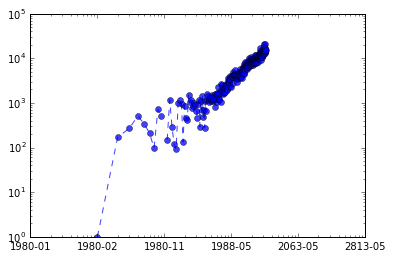

In [73]:
idir = "../../data/APS/aff_data_ISI_company_like/"


fnames = [f for f in sorted(os.listdir(idir)) if f[-4:] == ".dat"]

first_year, last_year   = int(fnames[0][:4]), int(fnames[-1][:4])
first_month, last_month = int(fnames[0][5:7]), int(fnames[-1][5:7])+1

Months = np.arange(-(first_year*12 + first_month) + last_year*12 + last_month)
Events = np.ones(len(Months))

for fn in fnames:
    lnum = 0
    with open(os.path.join(idir, fn), "rb") as f:
        for l in f:
            lnum += 1
    tmp_year, tmp_month = int(fn[:4]), int(fn[5:7])
    
    Events[(tmp_year-first_year)*12 + tmp_month-first_month] += lnum


startYr, startMt = 1980, 1

plt.loglog(1 + Months[(startYr-first_year)*12 + startMt-first_month:] - Months[[(startYr-first_year)*12 + startMt-first_month]],\
           1 + Events[(startYr-first_year)*12 + startMt-first_month:] - Events[[(startYr-first_year)*12 + startMt-first_month]],\
          "o--", alpha=.75)
xlocs, xlabs = plt.xticks()

junk = plt.xticks(xlocs, ["%04d-%02d" % (startYr+loc//12, startMt+loc%12) for loc in xlocs])
